In [2]:
import os
import logging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


class PlotMetrics:
    def __init__(
        self, data_dir="~/.cache/models/results/data", plots_dir="~/.cache/models/results/plots"
    ):
        self.data_dir = os.path.expanduser(data_dir)
        self.plots_dir = os.path.expanduser(plots_dir)
        self.model_name_field = "model_name"
        self.sort_field = "total_model_size_gb"
        self.quant_metrics = [
            "perplexity",
            "response_length",
            "repetition_rate",
            "distinct_2",
            "readability",
            "time_to_first_token",
            "avg_time_per_token",
            "tokens_generated_per_response",
        ]
        self.size_metrics = ["num_model_params", "total_model_size_gb"]
        self.df = self.compile_csv_files_to_df()
        self.df_agg = self.save_df_quant_metrics()
        self.df_size = self.save_df_size_metrics()

        logger = logging.getLogger(__name__)

    def compile_csv_files_to_df(self):
        """Loops through a dir, collects all csv files, and compiles into a single df."""

        # Collect all csv files
        csv_files = []
        for file_name in os.listdir(self.data_dir):
            if file_name.endswith(".csv"):
                file_path = os.path.join(self.data_dir, file_name)
                csv_files.append(file_path)

        # No csv files found
        if not csv_files:
            raise FileNotFoundError(f"No CSV files found in {self.data_dir}")

        df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
        df = df.sort_values(by=[self.sort_field])
        df.to_csv(os.path.join(self.plots_dir, "df.csv"), index=False)
        return df

    def save_df_quant_metrics(self):
        """Save an aggregated df with mean/std stats."""
        metrics_dict = {metric: ["mean", "std"] for metric in self.quant_metrics}
        metrics_dict[self.sort_field] = ["mean", "std"]
        df_agg = self.df.groupby(self.model_name_field, as_index=False).agg(metrics_dict)

        # Flatten columns
        df_agg.columns = [
            "_".join(col).strip("_") if isinstance(col, tuple) else col for col in df_agg.columns
        ]
        df_agg = df_agg.sort_values(by=[self.sort_field + "_mean"])

        # Save df
        df_agg.to_csv(os.path.join(self.plots_dir, "df_agg.csv"), index=False)
        return df_agg

    def save_df_size_metrics(self):
        """Save a df with model size metrics."""
        df_size = self.df.groupby(self.model_name_field, as_index=False)[self.size_metrics].max()
        df_size = df_size.sort_values(by=[self.sort_field])
        df_size.to_csv(os.path.join(self.plots_dir, "df_size.csv"), index=False)
        return df_size

    def plot_violin(self, metric):
        """Plots the distribution of a metric across all models using a violin plot."""
        if metric not in self.df.columns:
            raise ValueError(f"Metric '{metric}' not found in the DataFrame.")

        # Plot
        plt.figure(figsize=(12, 6))
        sns.violinplot(
            data=self.df,
            x=self.model_name_field,
            y=metric,
            palette="muted",
            hue=self.model_name_field,
            legend=False,
        )
        plt.title(metric.replace("_", " ").title(), fontsize=16)
        plt.ylabel("")
        plt.xlabel(self.model_name_field.replace("_", " ").title(), fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Save plot
        plot_path = os.path.join(self.plots_dir, f"{metric}_violin_plot.png")
        plt.savefig(plot_path)

    def plot_size_metric(self, metric):
        """Plots model sizes."""
        if metric not in self.df.columns:
            raise ValueError(f"Metric '{metric}' not found in the DataFrame.")

        # Plot
        plt.figure(figsize=(12, 6))

        sns.barplot(
            x=self.model_name_field,
            y=metric,
            hue=self.model_name_field,
            data=self.df_size,
            palette="muted",
            legend=False,
        )

        plt.title(metric.replace("_", " ").title(), fontsize=16)
        plt.ylabel("")
        plt.xlabel(self.model_name_field.replace("_", " ").title(), fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Save plot
        plot_path = os.path.join(self.plots_dir, f"{metric}_size_plot.png")
        plt.savefig(plot_path)

    def plot_all_metrics(self):
        """Plots all metrics and saves output as png."""
        for metric in self.quant_metrics:
            self.plot_violin(metric)

        for metric in self.size_metrics:
            self.plot_size_metric(metric)

In [3]:
pm = PlotMetrics()
pd.set_option("display.max_colwidth", None)

In [4]:
display(pm.df)
# display(pm.df_agg)
# display(pm.df_size)

,prompt,generated_text,model_name,perplexity,response_length,repetition_rate,distinct_2,readability,time_to_first_token,avg_time_per_token,tokens_generated_per_response,num_model_params,dtype,bytes_per_param,total_model_size_bytes,total_model_size_gb
0,Imagine you're a wizard who has been banished from your kingdom for practicing forbidden magic. How would you write a story about your journey to reclaim your honor and the challenges you face?,"Imagine you're a wizard who has been banished from your kingdom for practicing forbidden magic. How would you write a story about your journey to reclaim your honor and the challenges you face? Here's an idea: What if, when faced with temptation (like that delicious cake), instead of succumbing to it or turning into a monster, you take on another form?\nThe power in this story is not so much in what happens but rather how something as simple as taking on new forms can change us.\nIn today’s world we are bombarded by images of beauty all around us; everything seems perfect until someone comes along and tells us otherwise—sometimes even our own reflection! But there could be more than meets eye at first glance.\nThis book will help readers learn better ways to see themselves through different lenses—the lens they’re wearing now versus one which may reveal their true character traits beneath its surface appearance\nWhat Are Lenses In Literature And The Power Of Changing Perspectives By James Baldwin Analysis Essay Examples\nLenses represent both the ability to perceive things objectively while also being able to understand them based off personal experiences within society - therefore allowing people everywhere access towards finding answers regarding various subjects such as racism, sexism etc… This type of knowledge allows individuals living under oppressive systems like slavery & colonialism alike gain insightfulness towards overcoming these obstacles head-on!\nHow To Make Your First Lens Change For Better Perspective Essays Example",Llama-3_2-1B,13.195872,247,0.072874,0.995951,40.42,44.617891,23.212177,279,1235814400,torch.float32,4,4943257600,4.603767
1,"You're the captain of a spaceship exploring a distant galaxy. One day, you encounter an abandoned alien station emitting a strange signal. How would you write a story about what happens next?","You're the captain of a spaceship exploring a distant galaxy. One day, you encounter an abandoned alien station emitting a strange signal. How would you write a story about what happens next? Here",Llama-3_2-1B,16.780077,33,0.060606,0.969697,77.23,47.379494,1.351639,38,1235814400,torch.float32,4,4943257600,4.603767
2,A detective is called to investigate a murder at a remote mansion during a thunderstorm. How would you write a story from the detective's perspective as they unravel the mystery?,A detective is called to investigate a murder at a remote mansion during a thunderstorm. How would you write a story from the detective's perspective as they unravel the mystery? What,Llama-3_2-1B,14.903556,31,0.064516,0.967742,55.74,47.365189,1.387610,35,1235814400,torch.float32,4,4943257600,4.603767
3,You're a merchant traveling along the Silk Road in the 14th century. How would you write a story about an unusual event or encounter during your journey?,You're a merchant traveling along the Silk Road in the 14th century. How would you write a story about an unusual event or encounter during your journey? In,Llama-3_2-1B,18.497686,28,0.071429,0.964286,74.19,47.434568,1.447244,33,1235814400,torch.float32,4,4943257600,4.603767
4,The world has been devastated by a zombie plague leaving only a handful of survivors. How would you write a story about how you navigate this new world?,The world has been devastated by a zombie plague leaving only a handful of survivors. How would you write a story about how you navigate this new world? What,Llama-3_2-1B,17.403799,29,0.068966,0.965517,73.68,37.340641,1.284538,31,1235814400,torch.float32,4,4943257600,4.603767
5,Imagin

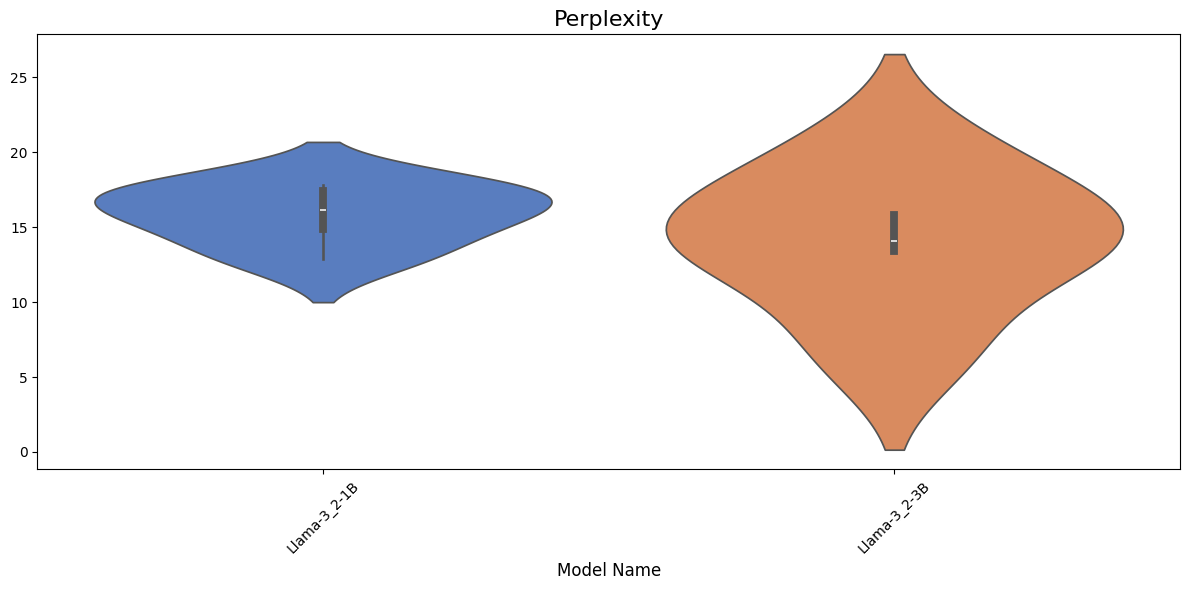

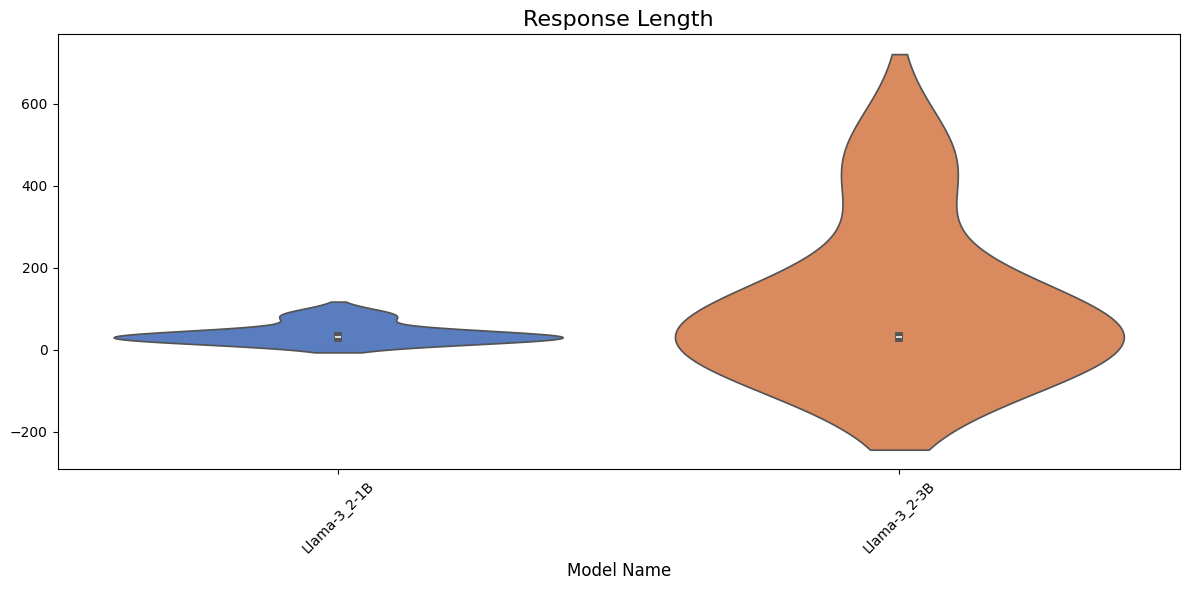

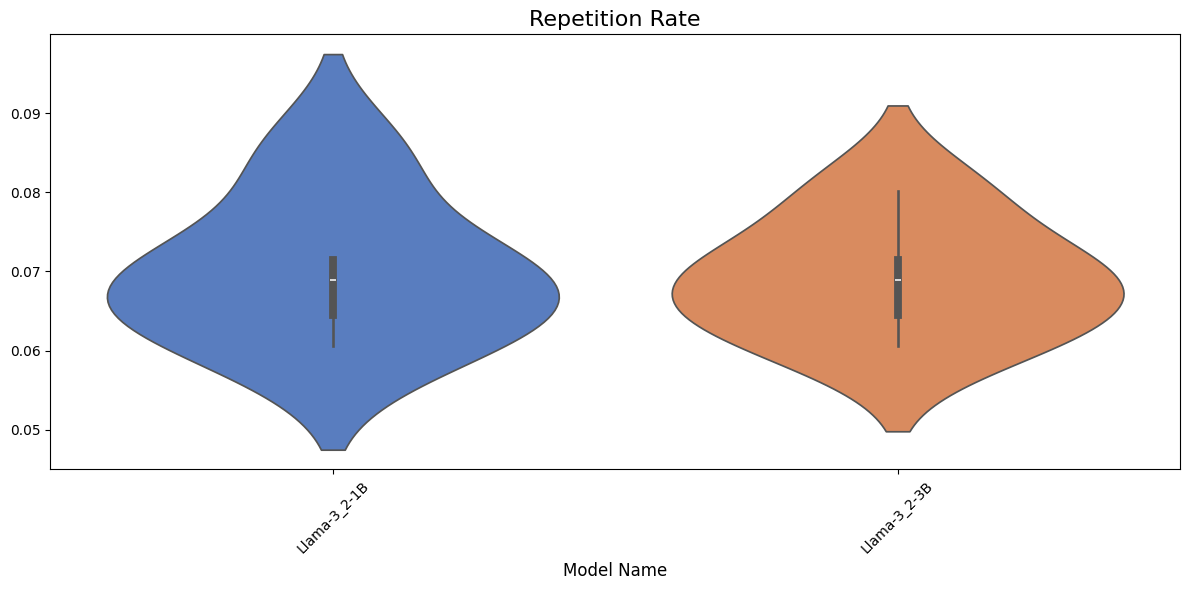

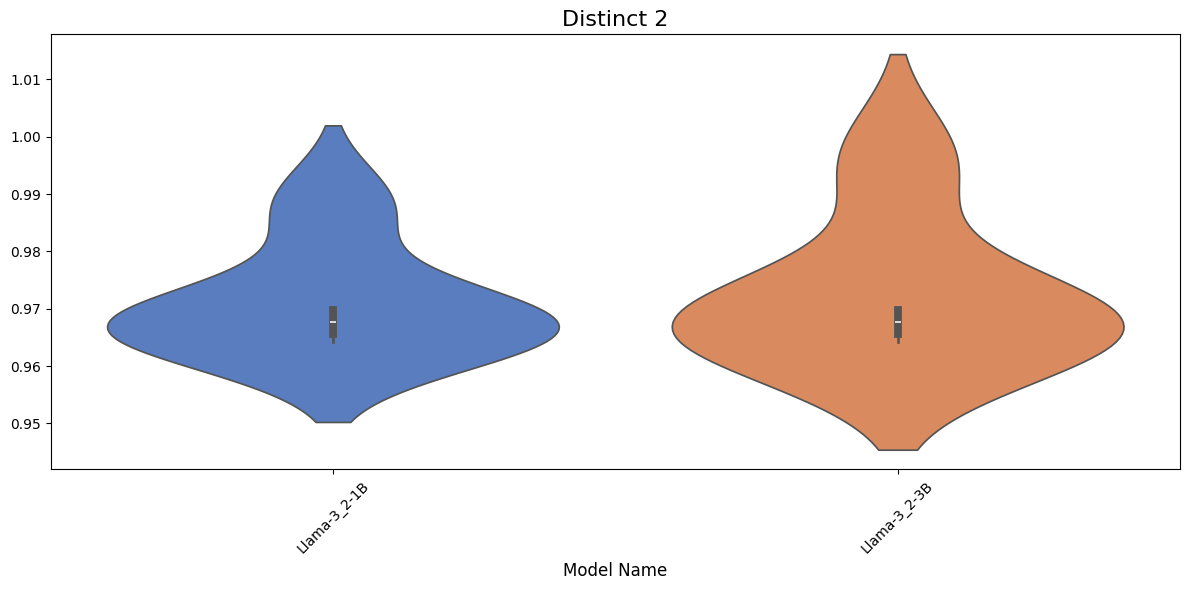

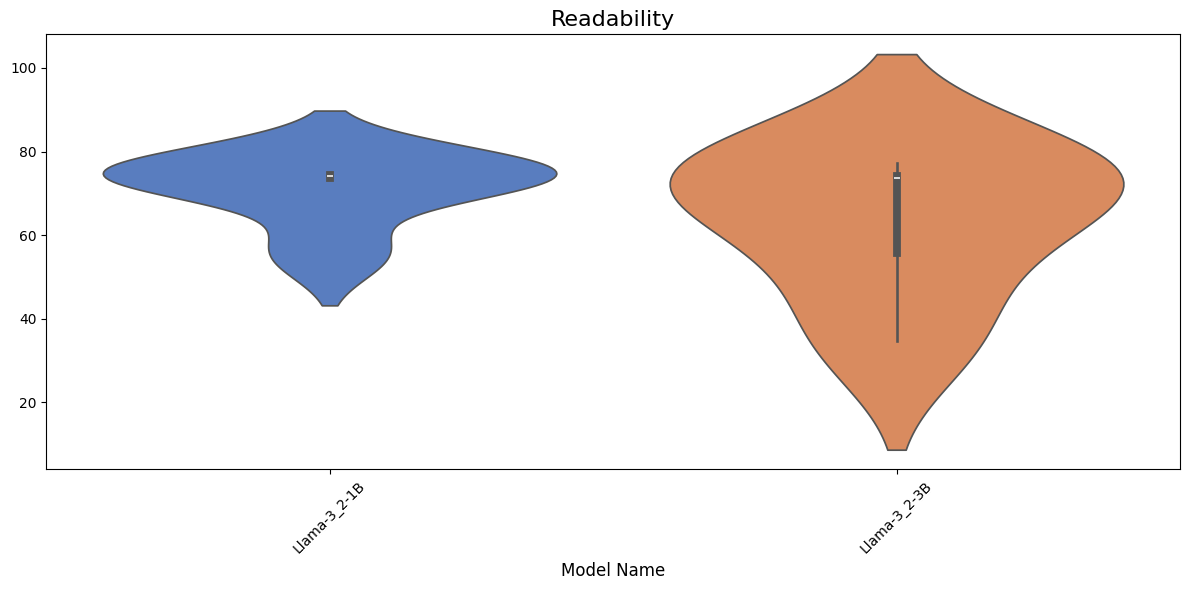

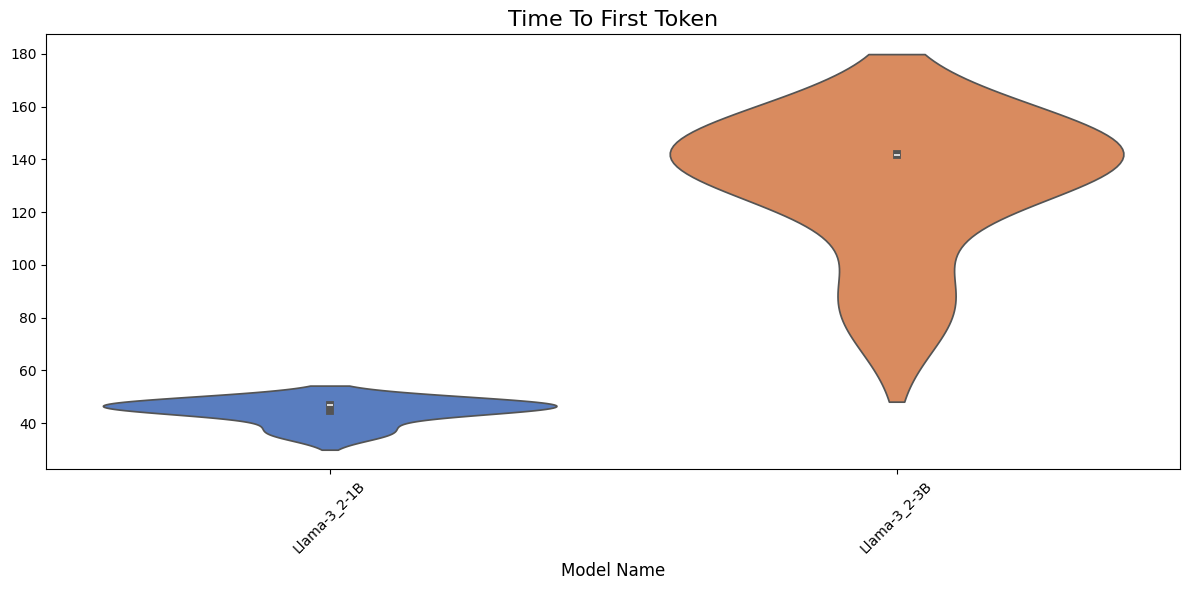

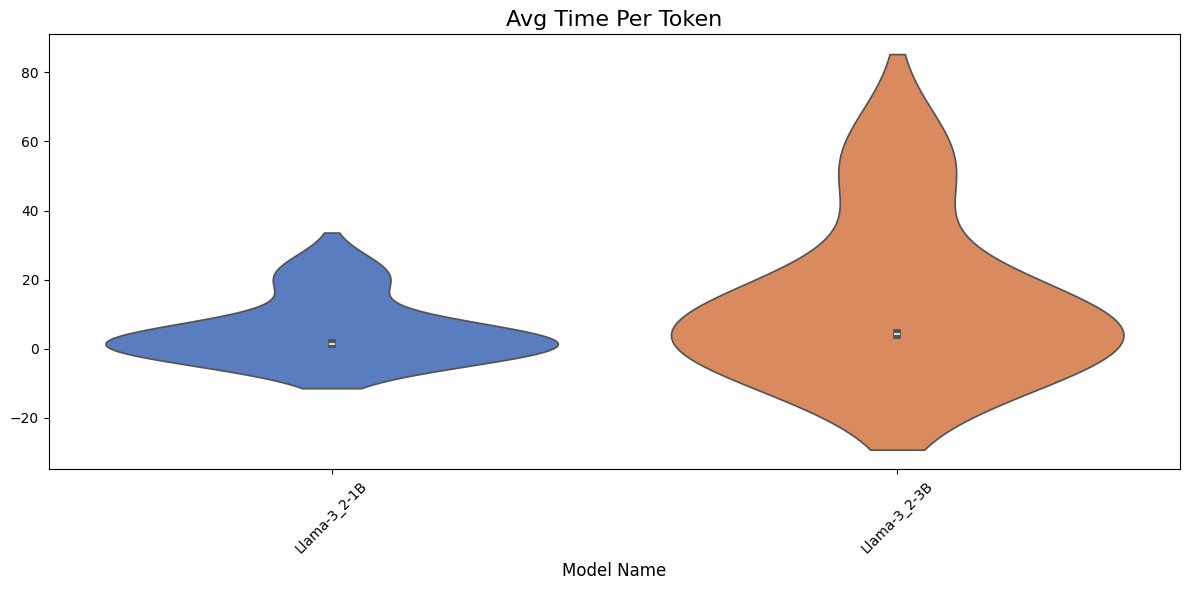

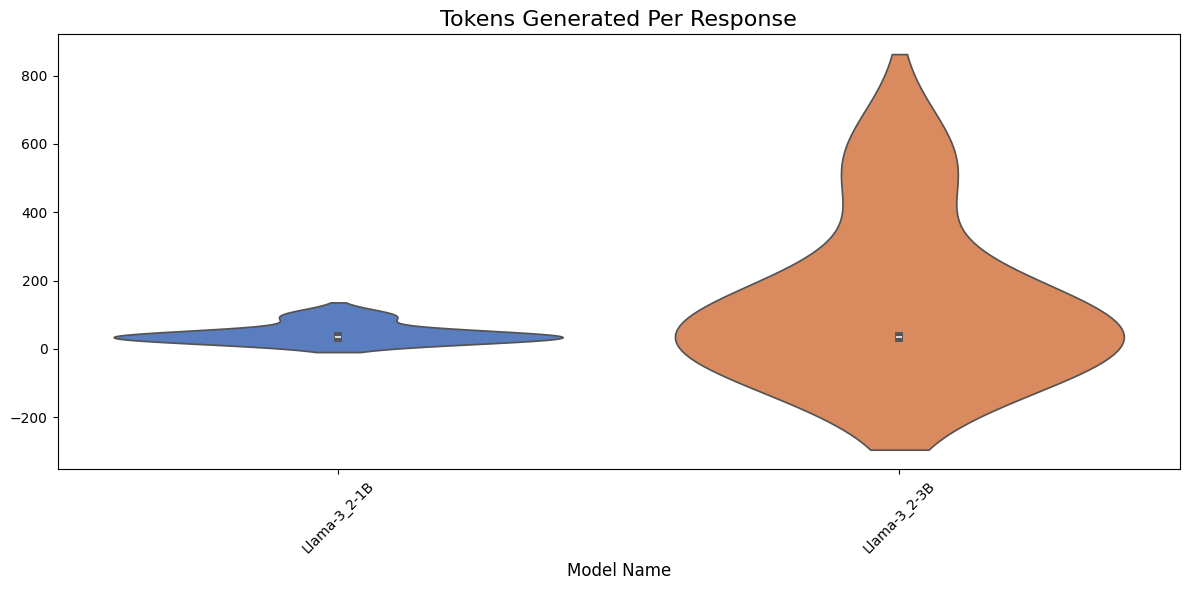

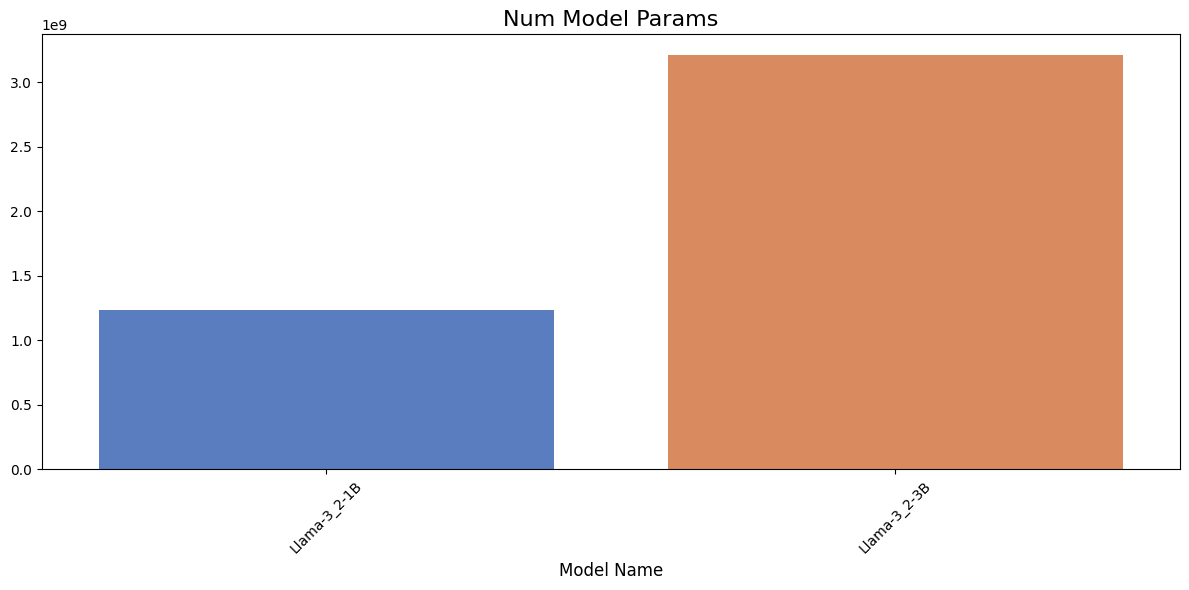

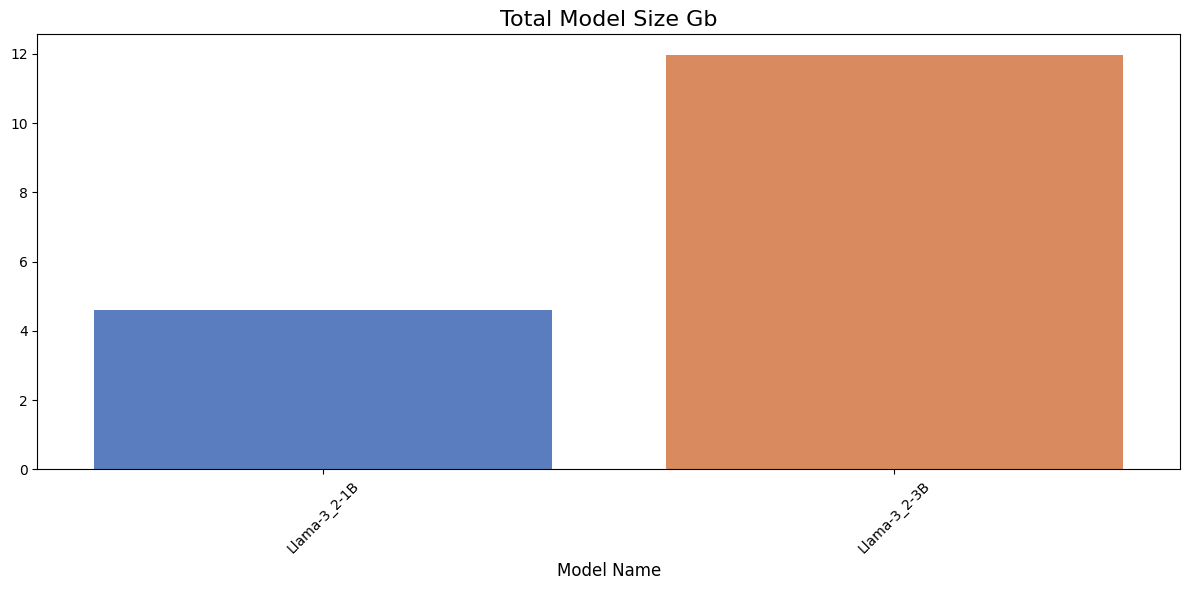

In [60]:
pm.plot_all_metrics()